In [1]:
# imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

from sklearn.decomposition import PCA
from sklearn.manifold import MDS, TSNE
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

In [2]:
# import datasets
df = pd.read_excel('dataset.xlsx')
evaluation = pd.read_excel('evaluation.xlsx')

### Set Values:

In [3]:
# encoding method
# options: label, ohe (one hot encoder)
encoder = 'label'

# dimensionality reduction method, select one or leave empty
# pca outperforms the other methods drastically, though none work particularly well
# options: pca, mds, tsne
dim_red = 'pca' # default: pca for no correlation between columns

# if pca is selected, variance explained can also be used as a decimal (i.e. ".30")
# if tsne is selected, please limit components to 4
n_comp = 31 # default: 31 for label encoder

# machine learning method
# options: logreg, randomforest, naivebayes, knn, svm
mach_learn = 'logreg' # default: logreg for maximum accuracy

## Data Exploration

         X0        X1        X2        X3        X4        X5        X6  \
0  0.985703  0.899527  2.332283  1.044273  1.141718 -1.656647 -1.409265   
1  0.539816  0.243602  1.636048 -0.562150 -0.235560 -1.316039  1.529069   
2 -1.424483 -0.470533  0.095100  0.131981  1.168902 -0.827530 -1.233111   
3 -1.034157 -1.054496  0.339467 -0.829151  0.012123  0.048887  0.573195   
4  0.177091  1.154216  1.004133 -0.724015 -0.508090 -0.478284 -0.524431   

         X7        X8        X9  ...       X22       X23       X24       X25  \
0  1.043518 -0.931461 -1.726754  ...  0.628801  0.511403  0.562767 -0.356514   
1 -1.415871 -1.167266 -0.103195  ...  0.734907  0.929244 -0.805046  0.268788   
2  0.556679 -1.384065 -1.197944  ... -1.398526 -2.139636 -1.238090 -0.139802   
3 -0.189184 -0.674289  0.975835  ...  0.305298 -0.368107 -0.664859  0.225715   
4  1.841560 -1.147140  0.435025  ...  1.095991 -0.993104 -0.775456  0.938553   

        X26       X27       X28       X29  XC  y  
0  0.867604 -0.21

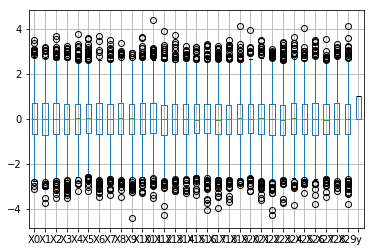

In [4]:
# explore dataset
print(df.head(5))
print(df.isna().sum()) # no missing values?
df.boxplot() # mostly standardized already

# variance threshold doesn't seem applicable 

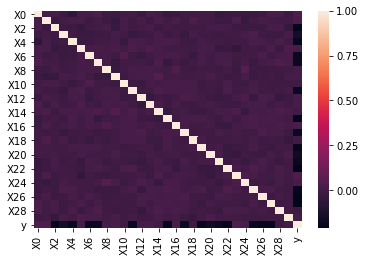

In [5]:
# correlation heatmap (no direct linear relationships)
# print(df.corr())
sns.heatmap(df.corr())
# univariate selection won't work well either, nor high-correlation filters

In [6]:
# one hot encoder
if (encoder == 'ohe'):
    df = df.join(df.XC.str.get_dummies())
    df = df.drop(['XC'],axis=1)

In [7]:
# label encoder
if (encoder == 'label'):
    df.XC = [ord(x)-64 for x in df.XC]

In [8]:
# split dataset
X,y = df.iloc[:,df.columns!='y'],df[['y']]

X_train,X_test,y_train,y_test = train_test_split(
    X,y,test_size=.25,stratify=y)

# reset indices
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

## Dimensionality Reduction

### Principal Component Analysis (PCA)
For some reason, PCA is returning a linear amount of explained_variance per column. Usually, the plot should resemble a logarithmic curve with descreasing explained variance. Furthermore, in this case the PCA columns predict substantially worse than the normal dataset, yet the accuracy should be nearly identical given they hold the same information. I'm not sure if this is an issue with the code, the math, or the problemset, but for these reasons, I will not employ PCA for dimensionality reduction.

In [9]:
# scale data for PCA
ss = StandardScaler()
X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.transform(X_test)

if (dim_red == 'pca'):
    # PCA model
    pca = PCA(n_components=n_comp) # explain 99% of variance
    pca.fit(X_train_ss)
    X_train_pca = pca.transform(X_train_ss)
    X_test_pca = pca.transform(X_test_ss)
    # pca.transform(evaluation)

    # put data back into df format (I find it prettier)
    X_train = pd.DataFrame(X_train_pca)
    X_test = pd.DataFrame(X_test_pca)

    X_train.head()

/home/xirailuyo/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/xirailuyo/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/xirailuyo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [10]:
# explained variance per feature

if (dim_red == 'pca'):
    plt.plot(np.cumsum(pca.explained_variance_ratio_))
    plt.show()

### Multidimensional Scaling (MDS)

In [11]:
if (dim_red == 'mds'):
    mds = MDS(n_components=n_comp)
    X_train = mds.fit_transform(X_train_ss)
    X_test = mds.fit_transform(X_test_ss)

# MDS does a great job at predicting 0s (5 components: .97), but a terrible job at predicting 1s (5 components: .05)
# as a result, MDS will not be utilized as a dimensionality reduction methods

### t-distributed Stochastic Neighbor Embedding

In [12]:
if (dim_red == 'tsne'):
    tsne = TSNE(n_components=n_comp) # must be less than 4 due to quad-tree structure
    X_train = tsne.fit_transform(X_train_ss)
    X_test = tsne.fit_transform(X_test_ss)

# same problem, great accuracy for 0s, terrible for 1s. The information for predictings 1s is being lost in
# the dimensionality reduction (kind of like compression)

## Clustering Methods

### KMeans

## Machine Learning Models

### Logistic Regression

In [13]:
# baseline using all features
# each model fits and predicts according to a model, providing a
# confusion matrix and classification report with the f1-score

if (mach_learn == 'logreg'):
    lr = LogisticRegression()
    lr.fit(X_train,y_train)
    y_predict_lr = lr.predict(X_test)

    print(confusion_matrix(y_predict_lr,y_test))
    print(classification_report(y_predict_lr,y_test))

[[513   6]
 [  4 227]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       519
           1       0.97      0.98      0.98       231

   micro avg       0.99      0.99      0.99       750
   macro avg       0.98      0.99      0.98       750
weighted avg       0.99      0.99      0.99       750



/home/xirailuyo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/xirailuyo/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Random Forest

In [14]:
if (mach_learn == 'randomforest'):
    rf = RandomForestClassifier(max_depth=15)
    rf.fit(X_train,y_train)
    y_predict_rf = rf.predict(X_test)

    print(rf.feature_importances_, '\n')
    print(confusion_matrix(y_predict_rf,y_test))
    print(classification_report(y_predict_rf,y_test)) 
    # 0.015-0.05 All columns are moderately useful
    # would allow for feature selection if significant difference

### Naive Bayes

In [15]:
if (mach_learn == 'naivebayes'):
    gnb = GaussianNB()
    gnb.fit(X_train,y_train)
    y_predict_gnb = gnb.predict(X_test)

    print(confusion_matrix(y_predict_gnb,y_test))
    print(classification_report(y_predict_gnb,y_test))

### k-Nearest Neighbors

In [16]:
if (mach_learn == 'knn'):
    knn = KNeighborsClassifier()
    knn.fit(X_train,y_train)
    y_predict_knn = knn.predict(X_test)

    print(confusion_matrix(y_predict_knn,y_test))
    print(classification_report(y_predict_knn,y_test))

### Support Vector Machines

In [17]:
if (mach_learn == 'svm'):
    svc = svm.SVC()
    svc.fit(X_train,y_train)
    y_predict_svc = svc.predict(X_test)

    print(confusion_matrix(y_predict_svc,y_test))
    print(classification_report(y_predict_svc,y_test))

## Evaluation

This is the final used to acquire the results.csv file. Hopefully no errors exist here. Make sure dim_red is set to ' '.

In [18]:
eval_X = evaluation.iloc[:,:-1]
eval_index = evaluation.iloc[:,-1]

eval_X.XC = [ord(x)-64 for x in eval_X.XC]

eval_y = lr.predict(eval_X)

eval_final = pd.concat([eval_index, pd.DataFrame(eval_y)], axis=1)
eval_final = eval_final.rename(columns={"scenario":"dataset_id",0:"prediction_score"})

In [19]:
eval_final.to_csv(r'~/Desktop/WF/results.csv', index=False)

In [20]:
eval_final

,dataset_id,prediction_score
0,1,1
1,2,0
2,3,1
3,4,0
4,5,0
5,6,0
6,7,1
7,8,0
8,9,0
9,10,1
